<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

**Эрнест, привет!** 👋

Меня зовут Алексей Манелюк, я буду проверять твой проект. В Яндекс Практикуме принято общаться на "ты", но если некомфортно - скажи и перейдем на "Вы".

Моя основная цель - не указать на ошибки, а поделиться опытом и помочь в освоении анализа данных.

В тетрадке ты увидишь мои комментарии, пожалуйста, не удаляй, не перемещай и не изменяй их. У комментариев могут быть приписки **V2**, **V3**, **V...**, которые соответствуют каждой версии проверки.

Я буду использовать цветовую разметку:
<p>
<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

Так выделены критические замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>  Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постарайся учесть их.</div>
<p>
<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

Все это поможет мне быстрее принять твой проект.</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Правильно, что начал проект с описания. Можно также добавить краткий план работы.</div>

### Откройте файл с данными и изучите общую информацию

* Загрузил файл с данными. В качестве разделителя в исходнных жанных используется знак таблуции. Указал на это с помощью аргумента `sep`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

📌 <s>Хорошая практика - разделять ячейки загрузки библиотек и данных. Если понадобится подключить дополнительную библиотеку, не нужно будет заново загружать данные и перезаписывать переменные.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

* Вывел первые 5 строк DataFrame чтобы убедиться в корректности прочтения файла

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* Собрал информацию методом `info`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Данные загружены верно, получена общая информация о датафрейме. 🚀</div>

* Отфильтровал DataFrame по типу данных. Оставил только численные данные типа `'float64' 'int64'`. По отфильтрованным данным построил гистограммы. Чтобы в вывод не попадал массивы numpy описывающие оси каждой из гистограмм, сохранил их в переменную `axes`.

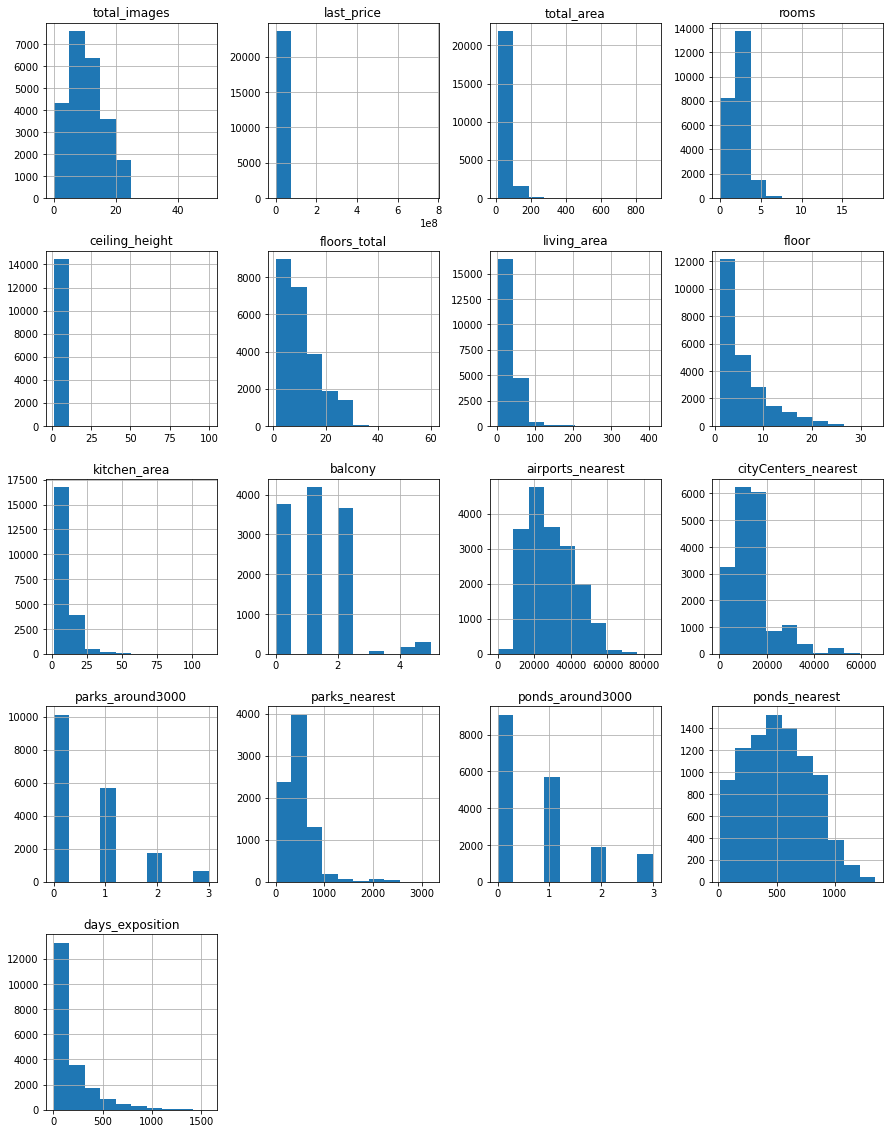

In [5]:
data_numbers = data.select_dtypes(include=['float64', 'int64'])
axes = data_numbers.hist(figsize=(15,20))

На основе анализа гистограмм выше можно предположить следующие:
* В данных пресутсвуют как численные, так и категориальные данные
* Есть численные данные с большими выбросами (хвостами)
* В целом на гистограммах не наблюдается аномальных значений и можно сделать вывод о корректности данных

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Как можно прокомментировать гистограммы? Какой предварительный вывод можно сделать по первому знакомству с данными?

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

### Выполните предобработку данных

#### Заполнение пропусков

##### Проверим столбцы на наличие пропусков. 
Применил метод `isna()`, который на месте пропусков вернул значение равное 1, в ином случая вернул 0. После этого просуммировал все значения в столбце методом `sum()`.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Абсолютные значения не такие репрезентативные как проценты. Выразил пропуски, как процент от общего количества строк. Для этого разделил весь столбец на количество строк в DataFrame

In [7]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

📌 <s>Оценить долю пропущенных данных во всех столбцах можно таким способом: `df.isna().mean()`.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

##### Выводы о возможности заполнения пропусков
Исходя из полученных данных делаю следующие предположения:
* Пропуски в столбце `ceiling_height` можно заполнить медианным значением
* Пропуски в столбце `floors_total` можно заполнить из столбца `floor`.
* Для пропусков в столбце `living_area` расчитаем значение исходя из среднего отношения жилой площади к общей площади
* При заполнении `is_apartment` произошла существенная потеря данных. Можно заполнить все недостающие значения 'False'
* Для пропусков в столбце `kitchen_area` расчитаем значение исходя из среднего отношения площади кухни к общей площади
* Пропуски в столбце `balcony` можно заполнить нулями. 
* Пропуски в столбце `living_area` незначительны. В виду невозможности их заполнения их можно удалить
* Для пропусков в столбцах `airports_nearest` и `cityCenters_nearest` невозможно подобрать логичную замену, которая не будет существенно влиять на данные
* Пропуски в категориях `parks_around` и `ponds_around` частично можно заменить используя данные из столбцов `parks_nearest3000` и `ponds_nearest3000`. Однако ввиду того что в столбцах `parks_nearest3000` и `ponds_nearest3000` тоже есть пропуски не вижу необходимости восстанавливать эти данные.
* Пропуски в столбце `days_exposition` можно рассчитать, основываясь на данных `first_day_exposition`. Если предположить что объявление активно на дату окончания сбора данных.

##### Заполнение столбцов с численными данными
Заполнил пропуски в столбце `ceiling_height` `balcony` и `floors_total`

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [10]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()

0

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Согласен с обработкой пропусков в этих признаках.

Заполнение пропусков в столбцах с жилой площадью и площадью кухни потребует дополнительных вычислений. Так в столбце `total_area` пропусков нет, то пропуски в столбцах `living_area` и `kitchen_area` могут быть рассчитаны

В первую очередь необходимо вычислить средний коэффициент отношения жилой площади к общей площади. И проделать то же самое для площади кухни

In [11]:
coef_living = (data['living_area'] / data['total_area']).mean()
coef_kitchen = (data['kitchen_area'] / data['total_area']).mean()

Для заполнения пропусков необходимо умножить общую площадь на расчитаные выше коэффициенты

In [12]:
data['living_area'].fillna(data['total_area'] * coef_living, inplace=True)
data['living_area'].isna().sum()

0

In [13]:
data['kitchen_area'].fillna(data['total_area'] * coef_kitchen, inplace=True)
data['kitchen_area'].isna().sum()

0

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь добавил заполение столбцов с жилой площадью и площадью кухни.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Отлично! 👍</div>

##### Удаление данных

In [14]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Удалил пропуски в данных.</div>

##### Заполнение пропусков столбца `is_apartment`

In [15]:
data.fillna(value={'is_apartment': 'False'}, inplace=True)
data['locality_name'].isna().sum()

0

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Заполнил столбец `is_apartment` исходя из предположения, что все объекты, где есть пропуски в данном столбце не являются апартаментами.</div>

##### Заполнение пропусков в датах
В первую очередь необходимо привести данные к формату **DateTime**

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Теперь определим граничную дату исходного датасета. То есть дату окончания сбора данных. Для этого определим самую позднюю дату публикации объявлений в датасете. 

In [17]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Выведем для этой даты все значения столбца `days_exposition` 

In [18]:
data.query('first_day_exposition == "2019-05-03 00:00:00"')['days_exposition']

2178    NaN
3254    NaN
4450    NaN
5986    NaN
8170    NaN
9217    NaN
10917   NaN
12003   NaN
12208   NaN
12343   NaN
12380   NaN
13746   NaN
13993   NaN
14246   NaN
14424   NaN
15072   NaN
15881   NaN
17551   NaN
17872   NaN
21887   NaN
Name: days_exposition, dtype: float64

Очень похоже, что это дата окончания сбора информации. Однако может быть что объявление было выставлено раньше и снято после указанной даты. Для этого необходимо вычислить последнюю дату снятия объявления. Для этого к дате `first_day_exposition` прибавим количество дней до снятия объявления`days_exposition`, если эта информация есть.

In [19]:
data['days_exposition'] = pd.to_timedelta(data['days_exposition'], unit='D')

data['max_date'] = data['first_day_exposition'] + data['days_exposition']
data['max_date'].max()

Timestamp('2019-05-02 00:00:00')

Получается что `2019-05-03 00:00:00` крайняя дата наблюдений в данном датасете. 

Предположим, что все пропуски в столбце `days_exposition` означают что объявления не было снято на дату окончания наблюдений.

Отталкиваясь от двух этих предположений заполним пропущенные значения

In [20]:
from datetime import datetime

for f in data.query('days_exposition.isna()').index:
    data.loc[f, 'days_exposition'] = data['first_day_exposition'].max() - data.loc[f, 'first_day_exposition']

data['days_exposition'] = data['days_exposition'].dt.days
data.drop(columns=['max_date'], inplace=True)

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Да, скорее всего пропуск означает, что объявление не снято с публикации на момент выгрузки.

##### Итоги заполнение пропусков

Исключены пропуски в следующих столбцах:
* `ceiling_height` - пропуски заполнение медианным значением. п.2.1.3
* `balcony` - пропуски заполнены нулями. п.2.1.3
* `floors_total` - пропуски заполнены на основе данных из столбца `floor` п. 2.1.3
* `living_area` и `kitchen_area` заполнил исходя из среднего отношения их величин к столбцу `total_area` п. 2.1.3
* `locality_name` - пропуски исключены из набора данных, ввиду их незначительного количества п. 2.1.4
* `is_apartment` - пропуски заполнены значением 'False' п. 2.1.5
* `days_exposition` - пропуски заполнены на основании даты публикации `first_day_exposition` и границы датасета п. 2.1.6

В остальных столбцах пропуски не могут быть заполнены без существенного искажения данных

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>По итогу остались пропуски в столбцах:

- living_area
- is_apartment
- kitchen_area
- locality_name
    
Площади жилой и кухни можно заполнить через средний коэффициент отношения к общей площади, если не указано что квартира аппартаменты, скорее всего она ими не является (по аналогии с балконами), пропусков в населенных пунктах немного и это один из ключевых параметров, можно удалить эти строки.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Исключил пропуски в указанных столбцах.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Обработка пропусков выполнена правильно!

#### Измнение типов данных

В пункте 2.1.5 было выполнено преобразование к типу данных `datetime64` для столбца `first_day_exposition`

In [22]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [23]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.797718,9,False,...,29.789403,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Исходя из вывода ячейки выше возникли следующие предположения:
* Тип данных в столбцах `airports_nearest` и `cityCenters_nearest` могут быть заменены на `Int`
* Тип данных в столбцах `parks_around3000` и `ponds_around3000` могут быть заменены на `Int`
* Тип данных в столбцах `parks_nearest` и `ponds_nearest` могут быть заменены на `Int`

In [24]:
data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000',
     'parks_nearest', 'ponds_nearest']] = data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 
                                                'ponds_around3000', 'parks_nearest',  'ponds_nearest']].astype('Int64')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  int64
dtype: object

Использован именно тип данных `Int`, а не `int` так как в столбцах содержатся пропуски (NA). А тип данных `int` не позволяет работать с ними

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Столбец `floors_total` тоже можно привести к целочисленному типу.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Столбец `floors_total` и так имеет тип int64.</div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера V2 ⚠️</b>

Проверка показывает, что нет 👇

In [84]:
# Код ревьюера
data['floors_total'].dtypes

dtype('float64')

#### Устранение неявных дубликатов

In [25]:
display(len(data['locality_name'].unique()))
data['locality_name'].unique()

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце `locality_name` находиться 365 значений. И в нем присутвуют неявные дубликаты. Вызвано это различиями в написании слова поселок. Используются буквы `е` и `ё`. Также есть путаница с типом населенного пункта. Для исключения неявных дубликатов будем считать что `поселок городского типа`, `городской поселок` и `поселок` это одинаковые наименования.


In [26]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
)

In [27]:
display(len(data['locality_name'].unique()))
data['locality_name'].unique()

322

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

После исключения неявных дубликатов в столбце осталось только 323 уникальных населенных пункта

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Неявные дубликаты обработаны правильно!

#### Итоги предобработки данных

Исходные данные содержали значительное количество пропусков, однако самые важные категории были заполнены на 100%. Часть недостающих числовых данных заполнена с использованием медианных значений. Часть исходя из базовой логики. Пропуски в площадях заполнены исходя из среднего коэффициента соотношения общей площади объекта к его составным частям. Пропуски в счетчике дней с момента выставления объявления, заполнены исходя из даты выставления объявления. А также даты закрытия сбора информации по-данному датасету. Удалены строки с пропусками в названии локации.

Изменен тип данных для даты выставления объявления. Это необходимо для удобства работы. Также измене тип данных для целочисленных значений на int, для экономии вычислительных ресурсов и памяти

В названиях населенных пунктов исключены чередования `е` и `ё`. А также исключена путаница в типах населенных пунктов

Всего при предобработке данных исключено 49 строк

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>В конце предобработки имеет смысл написать краткий промежуточный вывод: что сделано, все ли типы данных приведены к нужным, и сравнить первоначальную таблицу с обработанной на предмет того, сколько данных мы выбросили. </div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

### Добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

Создадим столбец с ценой за квадратный метр. Для этого разделим стоимость на общую площадь объекта. Результат округлим до двух знаков и запишем в новый столбец.

In [29]:
data['price_per_square'] = round(data['last_price'] / data['total_area'], 2)

#### День недели публикации объявления

Создадим столбец с порядковым номером дня недели в который было размещено объявление. Для этого воспользуемся методом `dt.dayofweek`

In [30]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

#### Месяц публикации объявления

Аналогично создадим столбце с номером месяца. Для этого воспользуемся методом `dt.month`

In [31]:
data['month'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

Аналогично создадим столбце с годом. Для этого воспользуемся методом `dt.year`

In [32]:
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

Для определения типа этажа квартиры необходимо сравнить значение в столбце этажа и общей этажности дома. Для этого воспользовался срезами и сравнил между собой `floor` и `floors_total`. Если они равны то это последний этаж. Если этаж равен 1, то это первый этаж. Все пропуски заполнил значением "другой". Результат сравнения записал в столбец `floor_type`

In [33]:
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data['floor_type'].fillna('другой', inplace=True)

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Здесь использование цикла не обязательно: можно воспользоваться срезами (методом `loc[]`) или написать функцию, прогнав ее по столбцам.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Это более оптимальное решение. 👌

#### Расстояние до центра города в километрах

In [34]:
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].astype(float).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482,2,755,57,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.797718,9,False,...,84,3,234,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112,1,48,121,100000.00,1,6,2018,другой,8.0


In [35]:
# Код ревьюера
data[['floor', 'floors_total', 'floor_type']].sample(10)

,floor,floors_total,floor_type
6096,4,5.0,другой
5809,3,6.0,другой
20334,2,4.0,другой
17088,1,16.0,первый
17005,18,19.0,другой
9124,2,7.0,другой
8023,9,9.0,последний
7335,1,24.0,первый
22801,1,17.0,первый
17304,13,16.0,другой


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Дополнительные данные рассчитаны и добавлены правильно.



### Проведите исследовательский анализ данных

#### Изучение данных по категориям. Исключение аномальных значений

##### общая площадь, жилая площадь  и площадь кухни

Для исследовательского анализа данных объединил категории описывающие площадь объекта. Общую, жилую и площадь кухни. Так как все они имеют идентичный характер. Для начала построил для каждого столбца гистограмму распределения значений.

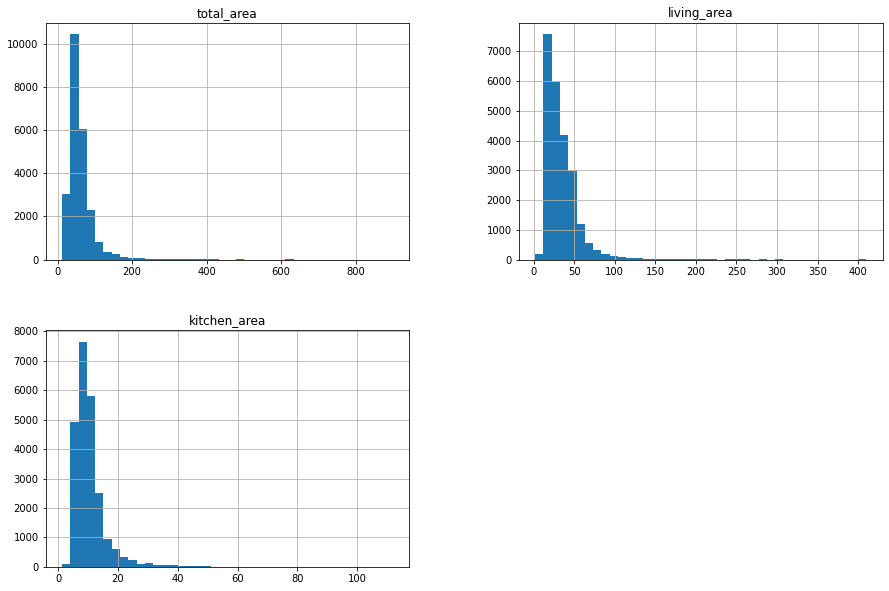

In [36]:
axis = data.hist(column=['total_area', 'living_area', 'kitchen_area'], bins=40, figsize=(15,10))

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Помимо названия, на графике хорошо бы подписать заголовки осей.

Из графиков видно, что данные имеют распределение Пуассона. Также мы можем наблюдать большие хвосты. Для подтверждения этой информации построим диаграммы размаха и посмотрим разбивку значений по карателям

,total_area,living_area,kitchen_area
count,23650.000000,23650.000000,23650.000000
mean,60.329069,34.550733,10.569111
std,35.661808,22.331969,6.092870
min,12.000000,2.000000,1.300000
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.050000
75%,69.700000,42.093758,12.000000
max,900.000000,409.700000,112.000000


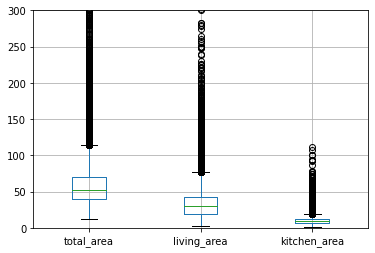

In [37]:
plt.ylim(0, 300)
data.boxplot(column=['total_area', 'living_area', 'kitchen_area'], figsize=(20,20))
data[['total_area', 'living_area', 'kitchen_area']].describe()

In [38]:
print('Количество вбросов для столбца total_area:', data.query('total_area > 115.25')['last_price'].count())
print('Количество вбросов для столбца living_area:', data.query('living_area > 76.7')['last_price'].count())
print('Количество вбросов для столбца kitchen_area:', data.query('kitchen_area > 19.5')['last_price'].count())

Количество вбросов для столбца total_area: 1210
Количество вбросов для столбца living_area: 884
Количество вбросов для столбца kitchen_area: 1338


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Можешь пояснить, как ты определил границы выбросов?

Границы выбросов определены по "усам" диаграммы размаха. Численные значения выведены из значений квартилей.

На примере `total_area`
значение 40.0 соответсвует границе первого квартиля Q1
значение 69.7 соответсвует границе трейтьего квартиля Q3

Разница между ними - межквартальный размах = 29,7
Усы простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха

Соответсвенно верхняя граница равна 69,7 + (29,7 * 1,5) = 114,25

Для `living_area`

Q1 = 19

Q3 = 42.09

IQR = Q3 - Q1 = 42.09 - 19 = 23.09

Верхняя граница = 42.09 + (23.09 * 1.5) = 76.7

Для `kitchen_area`

Q1 = 7

Q3 = 12

IQR = Q3 - Q1 = 12 - 7 = 5

Верхняя граница = 12 + (5 * 1.5) = 19.5

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Ок. Действительно метод IQR применяется для определения границ выбросов. Я бы только порекомендовал избежать хардкодинга, а рассчитать 1,5 межквартильного интервала по формуле.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Привел комментарии о границе размаха.</div>

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Также целесообразно провести логическую проверку, чтобы, например площадь кухни не превышала жилую, или жилая общую.

In [39]:
# Код ревьюера
data.query('kitchen_area > living_area or living_area > total_area')[['kitchen_area', 'living_area', 'total_area']]

,kitchen_area,living_area,total_area
4,41.00,32.00,100.00
6,14.40,10.60,37.30
51,50.00,38.00,161.00
53,15.50,15.40,39.10
101,13.00,12.00,37.00
...,...,...,...
23388,20.00,12.00,43.00
23481,16.88,10.08,37.29
23573,17.87,13.59,47.67
23574,16.00,3.00,139.00


Необходимо исключить строки в которых площадь кухни больше жилой площади или жилая площадь больше общей

In [40]:
res = data.query('kitchen_area > living_area or living_area > total_area').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482,2,755,57,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,89.797718,9,False,...,84,3,234,424,408176.10,4,7,2015,другой,7.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,796,3,381,773,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.345754,12,False,...,173,3,196,602,149511.40,1,3,2017,другой,10.0


<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил логическую проверку и удалил лишнее строки.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

👍

Исходя из диаграмм распределения и точных значений квартилей, рассчитаны границы значения за которыми можно считать вбросом. Также ячейка выше отображает количество значений для каждого столбца которое является вбросом. Так как скорее всего это пересекающиеся множество, то для чистоты данных будет корректным исключить их из DataFrame

In [41]:
res = data.query('total_area > 115.25').index
data.drop(res, inplace=True)

res = data.query('living_area > 76.7').index
data.drop(res, inplace=True)

res = data.query('kitchen_area > 19.5').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,<NA>,0,<NA>,15,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.500000,4,False,...,<NA>,<NA>,<NA>,413,45000.00,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,352,1,675,239,73717.95,4,8,2016,другой,34.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN


Предположение о пересекающемся множестве подтвердилось. Суммарно из данных было удалено 2121 строка.

##### цена объекта

Для удобства отображения информации приведем цены к млн рублей

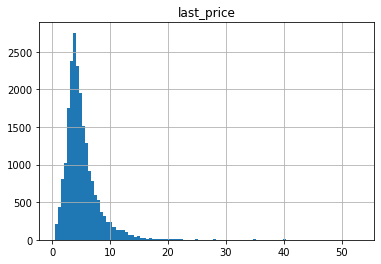

In [42]:
data['last_price'] = data['last_price'] / 1000000
axis = data.hist(column='last_price', bins=100)

Из графика видно, что данные имеют логнормальное распределение. Также мы можем наблюдать большие хвосты. А это означает что есть вбросы.

count    21517.000000
mean         5.100980
std          3.017846
min          0.430000
25%          3.300000
50%          4.450000
75%          6.100000
max         53.000000
Name: last_price, dtype: float64

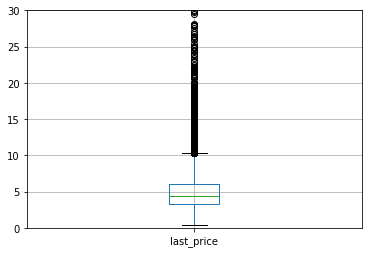

In [43]:
plt.ylim(0, 30)
data.boxplot(column='last_price')
data['last_price'].describe()

Граница выбросов для `last_price`

Q1 = 3.30

Q3 = 6.10

IQR = Q3 - Q1 = 6.10 - 3.30 = 2.80

Верхняя граница = 6.10 + (2.80 * 1.5) = 10.30

Основной диапазон данных от 0 до 10.03 млн рублей. Медианное значение равно 4.45 млн рублей

In [44]:
data.query('last_price > 10.03')['last_price'].count()

1214

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Здесь тоже хотелось бы более подробного пояснения про границу выбросов.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Привел комментарии о границе размаха.</div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

📌 Чтобы избавиться от экспоненциальных форм можно прописать настройку `Pandas`, в блоке импорта библиотек.

```python
pd.set_option('display.float_format', '{:,.2f}'.format)
```

Или перевести цены в млн рублей.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Попробовал форматировать, считать нули стало не очень приятно. Перевел данные к млн рублей.</div>

In [45]:
res = data.query('last_price > 10.03').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,<NA>,0,<NA>,15,110544.69,3,4,2019,другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1.350,30.00,2017-07-07,1,2.65,5.0,17.500000,4,False,...,<NA>,<NA>,<NA>,413,45000.00,4,7,2017,другой,NaN
23693,9,4.600,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,352,1,675,239,73717.95,4,8,2016,другой,34.0
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN


По аналогии с площадями исключены вбросы в столбце `last_price`. Удалено 1214 строк

##### количество комнат

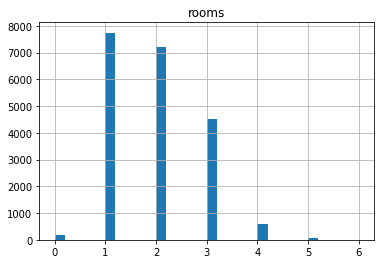

In [46]:
axis = data.hist(column='rooms', bins=30)

Из графиков видно, что данные имеют распределение Пуассона. Хвосты не наблюдаются. Для подтверждения этой информации построим диаграммы размаха и посмотрим разбивку значений по карателям

count    20303.000000
mean         1.889031
std          0.878575
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

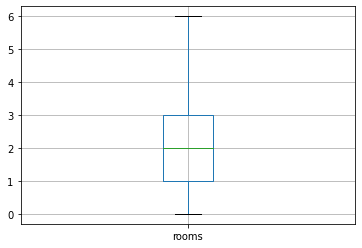

In [47]:
data.boxplot(column='rooms')
data['rooms'].describe()

Основной диапазон данных от 1 до 3. Медианное значение равно 2

В столбце `rooms` отсутствуют аномальные значения

##### высота потолков

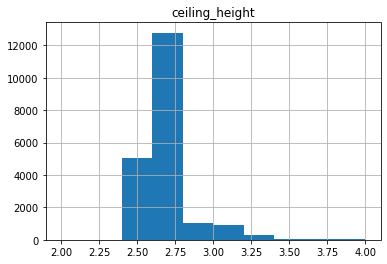

In [48]:
axis = data.hist(column='ceiling_height', bins=10, range=(2,4))

Из графиков видно, что данные имеют логнормальное распределение. Также мы можем наблюдать большие хвосты. А это означает что есть вбросы. Для подтверждения этой информации построим диаграммы размаха и посмотрим разбивку значений по карателям

count    20303.000000
mean         2.690852
std          0.804804
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

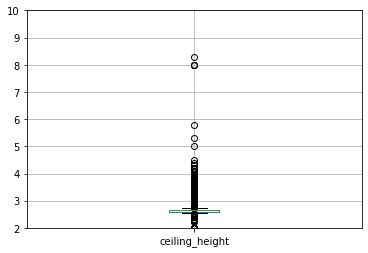

In [49]:
plt.ylim(2, 10)
data.boxplot(column='ceiling_height')
data['ceiling_height'].describe()

Основной диапазон данных от 2.6м до 2.65м. Медианное значение равно 2.65

In [50]:
data.query('ceiling_height > 4 or ceiling_height < 2')['last_price'].count()

45

In [51]:
res = data.query('ceiling_height > 4 or ceiling_height < 2').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,<NA>,0,<NA>,15,110544.69,3,4,2019,другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1.350,30.00,2017-07-07,1,2.65,5.0,17.500000,4,False,...,<NA>,<NA>,<NA>,413,45000.00,4,7,2017,другой,NaN
23693,9,4.600,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,352,1,675,239,73717.95,4,8,2016,другой,34.0
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN


По аналогии с площадями исключены вбросы в столбце `ceiling_height`. Удалено 45 строк
Из-за заполнения пропущенных значений медианной, произошло существенное искажение данных. Поэтому исключены только исключены только существенные искажения. Границы искажений определял руководствуясь логикой

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Получилось какое-то очень странное распределение данных - все потолки равны 2,65 м.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Имела место ошибка при заполнении пропусков. Случайно заменил все значения на медиану. Поправил.</div>

##### общее количество этажей в доме

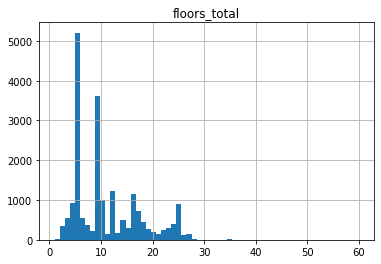

In [52]:
axis = data.hist(column='floors_total', bins=60)

Из графика сложно сделать выводы о виде распределения. Также мы можем наблюдать небольшие хвосты. А это означает что есть вбросы.

count    20258.000000
mean        10.688518
std          6.563126
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

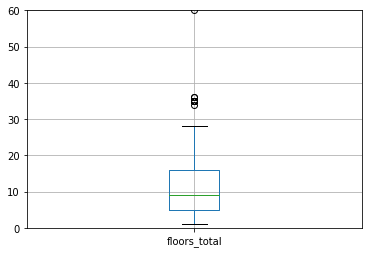

In [53]:
plt.ylim(0, 60)
data.boxplot(column='floors_total')
data['floors_total'].describe()

Основной диапазон данных от 5 до 16 этажей. Медианное значение равно 9 этажам

In [54]:
data.query('floors_total > 32.5')['last_price'].count()

19

In [55]:
res = data.query('floors_total > 32.5').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,<NA>,0,<NA>,15,110544.69,3,4,2019,другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1.350,30.00,2017-07-07,1,2.65,5.0,17.500000,4,False,...,<NA>,<NA>,<NA>,413,45000.00,4,7,2017,другой,NaN
23693,9,4.600,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,352,1,675,239,73717.95,4,8,2016,другой,34.0
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN


По итогу анализа исключены 19 анамальных значения

##### расстояние до центра города в метрах

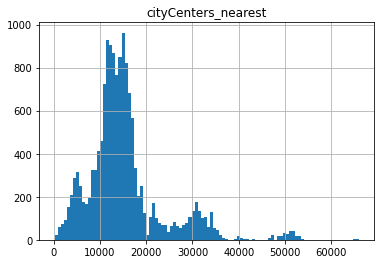

In [56]:
axis = data.hist(column='cityCenters_nearest', bins=100)

Из графика видно, что имеет место распределение похожее на нормальное с несколькими пиками. Пики объясняются характером неравномерности застройки в городах. Также мы можем наблюдать небольшие хвосты. Однако исходя из характера данных они могут не быть вбросами

count    14936.00000
mean     15284.49846
std       8498.29403
min        208.00000
25%      10936.50000
50%      13838.00000
75%      16804.00000
max      65968.00000
Name: cityCenters_nearest, dtype: float64

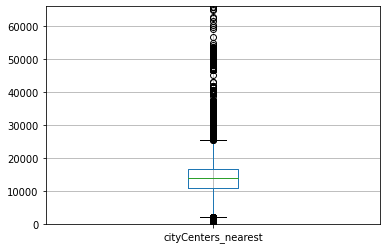

In [57]:
plt.ylim(0, 66000)
data.boxplot(column='cityCenters_nearest')
data['cityCenters_nearest'].describe()

Основной диапазон данных от 10936.5 до 16804 м. Медианное значение равно 13838 м

In [58]:
data.query('cityCenters_nearest > 25670 or cityCenters_nearest < 2022')['last_price'].count()

1869

In [59]:
data.query('cityCenters_nearest > 25670 or cityCenters_nearest < 2022')['locality_name'].unique()

array(['Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'поселок Металлострой', 'Сестрорецк', 'поселок Шушары',
       'Красное Село', 'поселок Понтонный', 'Санкт-Петербург', 'Павловск',
       'Зеленогорск', 'поселок Молодежное', 'поселок Песочный',
       'поселок Петро-Славянка', 'поселок Саперный', 'поселок Щеглово',
       'поселок Лисий Нос', 'поселок Левашово', 'поселок Белоостров',
       'поселок Репино', 'поселок Усть-Ижора', 'поселок Александровская'],
      dtype=object)

На мой взгляд вбросы в данном столбце не являются аномальным значением. Так как относятся к объектам расположенным в пригородных поселках. И в них расстояние до центра города может выбиваться из нормального распределения

##### расстояние до ближайшего парка

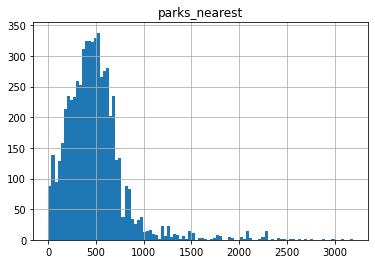

In [60]:
axis = data.hist(column='parks_nearest', bins=100)

Из графиков видно, что данные имеют логнормальное распределение. Также мы можем наблюдать большие хвосты. А это означает что есть вбросы. Для подтверждения этой информации построим диаграммы размаха и посмотрим разбивку значений по карателям

count    6101.000000
mean      486.733814
std       323.286908
min         1.000000
25%       290.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

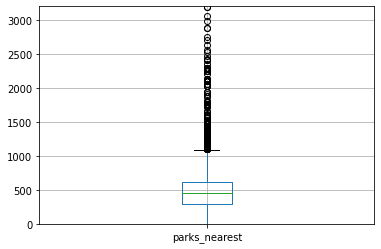

In [61]:
plt.ylim(0, 3200)
data.boxplot(column='parks_nearest')
data['parks_nearest'].describe()

Основной диапазон данных от 290 до 612 м. Медианное значение равно 456 м

In [62]:
data.query('parks_nearest > 1097.5')['last_price'].count()

217

In [63]:
res = data.query('parks_nearest > 1097.5').index
data.drop(res, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,floor_type,cityCenters_km
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,NaN
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,<NA>,0,<NA>,15,110544.69,3,4,2019,другой,12.0
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1.350,30.00,2017-07-07,1,2.65,5.0,17.500000,4,False,...,<NA>,<NA>,<NA>,413,45000.00,4,7,2017,другой,NaN
23693,9,4.600,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,352,1,675,239,73717.95,4,8,2016,другой,34.0
23695,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,<NA>,<NA>,<NA>,45,52542.37,0,1,2018,другой,NaN
23696,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,<NA>,<NA>,<NA>,446,44091.71,6,2,2018,первый,NaN


<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Помимо определения редких и выбивающихся значений, нужно по всем рассмотренным параметрам описать распределение данных: вид распределения, основной диапазон, описательные статистики.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил информацию по распределениям, основному диапазону данных и медианным значениям.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Количественные параметры квартир рассмотрены правильно.

#### Изучение скорости продажи квартиры

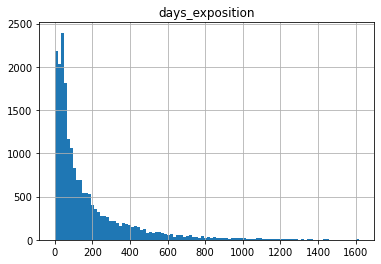

In [64]:
axis = data.hist(column='days_exposition', bins=100)

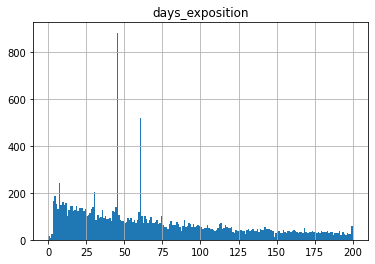

In [65]:
axis = data.hist(column='days_exposition', bins=200, range=(0, 200))

In [66]:
data['days_exposition'].value_counts()

45      882
60      517
7       240
30      202
4       188
       ... 
1481      1
1273      1
1209      1
1177      1
1455      1
Name: days_exposition, Length: 1103, dtype: int64

In [67]:
data['days_exposition'].describe()

count    20022.000000
mean       170.780591
std        214.212974
min          0.000000
25%         41.000000
50%         87.000000
75%        216.000000
max       1618.000000
Name: days_exposition, dtype: float64

Среднее количество дней до продажи: 214

Медианное значение: 171

Продажу которая совершилась за период меньше 40 дней, можно считать быстрой

Если сделка не произошла за 483 дня, то эту продажу можно считать долгой

Отдельно стоит отметить наличие пиков сделок на 45 и 60 день размещения объявления. Логичного объяснения данным аномалиям в данных я дать не могу. Однако и исключать эти данные из набора считаю не корректным.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>В целом все так, но стоит поподробнее рассмотреть диапазон, скажем, от 0 до 200 дней, возможно обнаружатся интересные факты.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Нашел локальные пики на 45 и 60 дне. Честно говоря, они меня сбивают с толку. Буду благодарен если подскажешь как работать с такими значениями. Что они могут обозначать. Может ли это быть аномалия именно в поведение пользователей, а не ошибка в данных?</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Да, ты правильно обратил внимание на эти пики. Если посмотреть [условия](https://yandex.ru/support/realty/owner/home/add-ads-housing.html) размещения объявлений, то было правило автоматического снятия объявлений с публикации в эти сроки.

#### Обнаружение наиболее влияющих на цену факторов

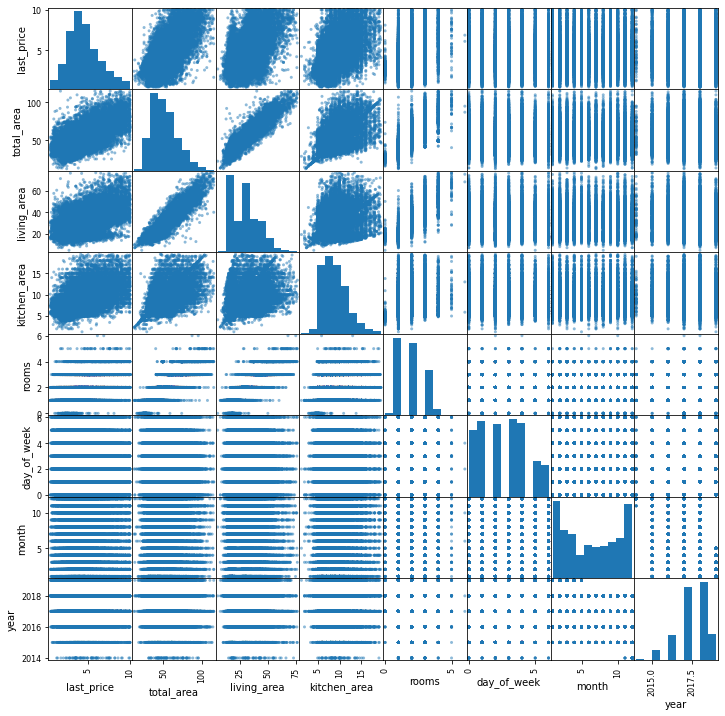

In [68]:
plot_data = data[['last_price', 
                  'total_area', 
                  'living_area', 
                  'kitchen_area', 
                  'rooms', 
                  'floor_type', 
                  'day_of_week', 
                  'month', 
                  'year']]

axes = pd.plotting.scatter_matrix(plot_data, figsize=(12, 12))

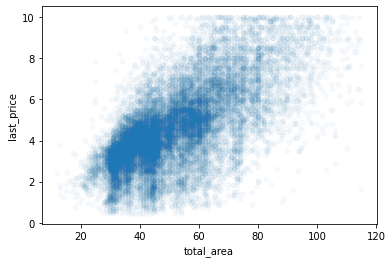

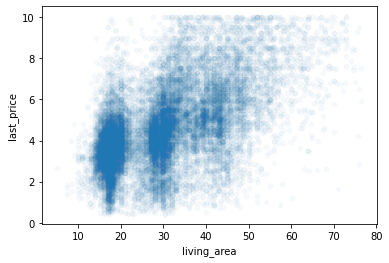

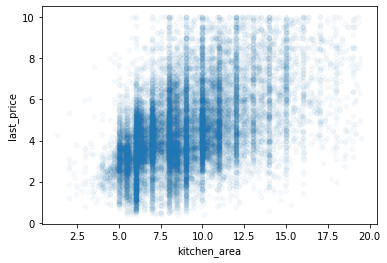

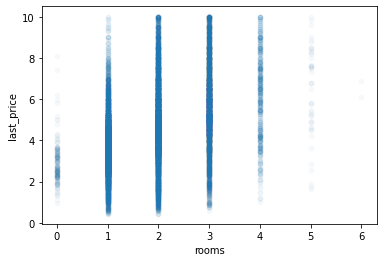

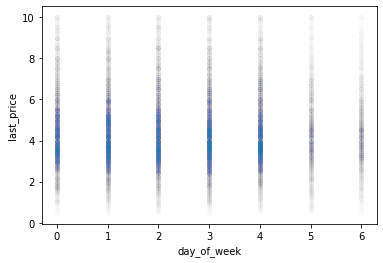

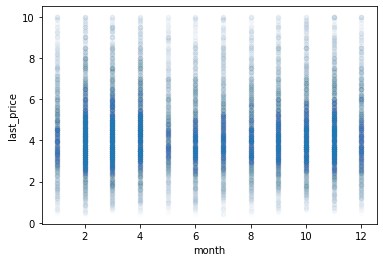

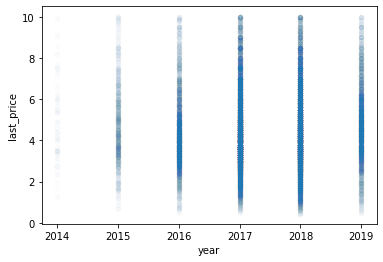

In [69]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03)
data.plot(x='day_of_week', y='last_price', kind='scatter', alpha=0.005)
data.plot(x='month', y='last_price', kind='scatter', alpha=0.01)
axes = data.plot(x='year', y='last_price', kind='scatter', alpha=0.01)

In [70]:
plot_data.corr()[['last_price']]

,last_price
last_price,1.000000
total_area,0.659262
living_area,0.552263
kitchen_area,0.478693
rooms,0.424835
day_of_week,-0.015850
month,-0.001267
year,0.015714


Исходя из графиков коррелиции и матрицы коэффициентов корреляции можно сделать следующие выводы:
* Общая площадь имеет сильное влияние на цену
* Жилая площадь имеет влияние на цену
* Площадь кухни имеет влияние на цену
* Количество комнат имеет влияние на цену
* День недели не имеет влияние на цену
* Месяц не имеет влияния на цену. Наблюдается едва заметные колебания от месяца к месяцу
* Год не имеет влияния на цену

rooms,0,1,2,3,4,5,6
last_price,2.7,3.55,4.55,5.5,6.365,6.8,6.482


<AxesSubplot:>

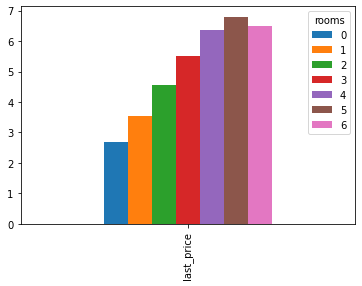

In [71]:
data_rooms = data.pivot_table(values='last_price', columns='rooms', aggfunc='median')
display(data_rooms)
data_rooms.plot(kind='bar')

floor_type,другой,первый,последний
last_price,4.48,3.75,3.95


<AxesSubplot:>

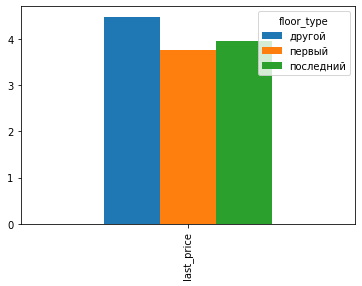

In [72]:
data_floor_type = data.pivot_table(values='last_price', columns='floor_type', aggfunc='median')
display(data_floor_type)
data_floor_type.plot(kind='bar')

day_of_week,0,1,2,3,4,5,6
last_price,4.3,4.3,4.3,4.28,4.25,4.29,4.2465


<AxesSubplot:>

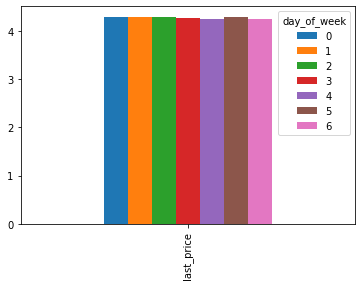

In [73]:
data_days = data.pivot_table(values='last_price', columns='day_of_week', aggfunc='median')
display(data_days)
data_days.plot(kind='bar')

month,1,2,3,4,5,6,7,8,9,10,11,12
last_price,4.3,4.3,4.3,4.499,4.25,4.1,4.2,4.2085,4.275,4.29,4.3,4.2785


<AxesSubplot:>

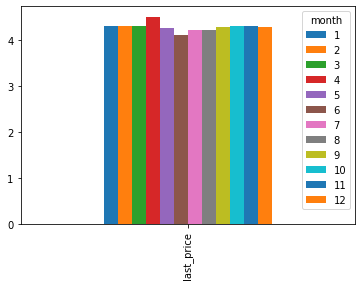

In [74]:
data_month = data.pivot_table(values='last_price', columns='month', aggfunc='median')
display(data_month)
data_month.plot(kind='bar')

year,2014,2015,2016,2017,2018,2019
last_price,4.6,4.55,4.15,4.15,4.25,4.7


<AxesSubplot:>

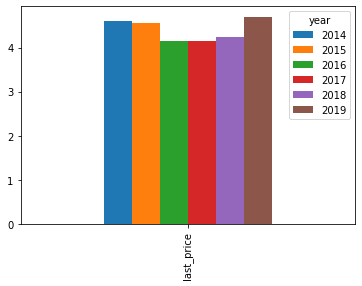

In [75]:
data_year = data.pivot_table(values='last_price', columns='year', aggfunc='median')
display(data_year)
data_year.plot(kind='bar')

Исходя из графиков корреляции, матрицы коэффициентов корреляции и столбчатых диаграмм медианных цен, разбитых по категориям можно сделать следующие выводы:
* Общая площадь имеет сильное влияние на цену
* Жилая площадь имеет влияние на цену
* Площадь кухни имеет влияние на цену
* Количество комнат имеет влияние на цену. Чем больше комнат, тем выше цена. Однако 6 комнатные квартиры стоят несколько меньше чем 5. 
* Тип этажа имеет незначительное влияние на цену. Квартиры на первых и последних этажах стоят немного дешевле
* День недели не имеет влияние на цену
* Месяц не имеет влияния на цену. Наблюдается едва заметные колебания от месяца к месяцу
* Год имеет незначительное влияние на цену. В 2016 и 2017 годах было незначительное снижение цены. Далее цена только росла.

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>По категориальным признакам (таким как количество комнат, тип этажа, день, месяц и год размещения) диаграмма рассеяния и коэффициент корреляции Пирсона не будут показательны, имеет смысл построить на графиках и сравнить медианные цены.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Исправил свою ошибку. Категориальные данные проанализировал с использованием столбчатых диаграмм и сравнил между собой медианные значения по категориям.</div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера V2 ⚠️</b>

Хорошо. Можно немного по-другому оформить графики, тогда будет видна сезонность и небольшая зависимость цены от дня размещения.

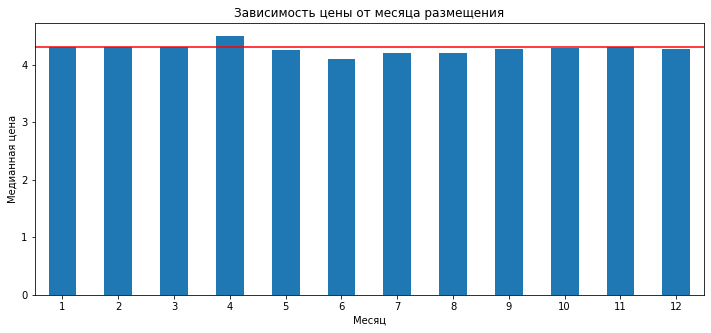

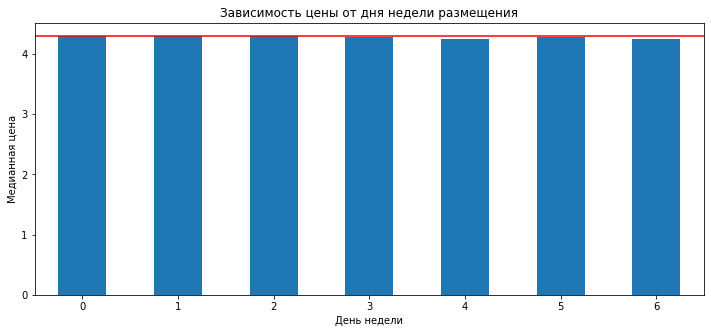

In [93]:
# Код ревьюера

data.groupby('month')['last_price'].median()\
    .plot(kind = 'bar',
         rot = 0,
         figsize = (12, 5),
         title = 'Зависимость цены от месяца размещения',
         xlabel = 'Месяц',
         ylabel = 'Медианная цена')\
         .axhline(data['last_price'].median(), color = 'r') #Добавил линию общей медианной цены
plt.show()

data.groupby('day_of_week')['last_price'].median()\
    .plot(kind = 'bar',
         rot = 0,
         figsize = (12, 5),
         title = 'Зависимость цены от дня недели размещения',
         xlabel = 'День недели',
         ylabel = 'Медианная цена')\
         .axhline(data['last_price'].median(), color = 'r') #Добавил линию общей медианной цены
plt.show()

#### Средняя цена квадратного метра для 10 наиболее часто встречаемых населенных пунктов

В первую очередь рассчитал среднюю цену квадратного метра для 10 наиболее часто встречаемых населенных пунктов с помощью цикла.

In [76]:
list_of_locations = list(data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index)

In [77]:
for location in list_of_locations:
    price = round(data.query('locality_name == @location')['price_per_square'].mean(), 2)
    print(f'{price} - Средняя стоимость квадратного метра в {location}')

104063.59 - Средняя стоимость квадратного метра в Санкт-Петербург
85460.72 - Средняя стоимость квадратного метра в поселок Мурино
78340.91 - Средняя стоимость квадратного метра в поселок Шушары
66527.87 - Средняя стоимость квадратного метра в Всеволожск
99692.17 - Средняя стоимость квадратного метра в Пушкин
75207.87 - Средняя стоимость квадратного метра в Колпино
89878.79 - Средняя стоимость квадратного метра в поселок Парголово
68507.77 - Средняя стоимость квадратного метра в Гатчина
92878.89 - Средняя стоимость квадратного метра в деревня Кудрово
58025.12 - Средняя стоимость квадратного метра в Выборг


Сделал то же самое с помощью сводной таблицы

In [78]:
mean_price_data = round(pd.pivot_table(data, index='locality_name', values='price_per_square', aggfunc = ['count', 'mean']), 2)
mean_price_data.columns = ['count', 'mean']
mean_price_data.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,12462,104063.59
поселок Мурино,535,85460.72
поселок Шушары,423,78340.91
Всеволожск,381,66527.87
Пушкин,320,99692.17
Колпино,318,75207.87
поселок Парголово,308,89878.79
Гатчина,298,68507.77
деревня Кудрово,276,92878.89


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Всё верно, это более оптимальное решение.

Вывел 10 наиболее дорогих локаций с точки зрения цены за квадратный метр

In [79]:
mean_price_data.sort_values(by='mean', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,12462,104063.59
поселок Лисий Нос,3,100660.82
Зеленогорск,20,100123.74
Сестрорецк,149,99760.76
Пушкин,320,99692.17
Кудрово,159,99584.47
поселок Левашово,1,96997.69
Мурино,29,95909.69
деревня Мистолово,10,95630.33


Вывел 10 наиболее дешевых локаций с точки зрения цены за квадратный метр

In [80]:
mean_price_data.sort_values(by='mean').head(10)

,count,mean
locality_name,,
деревня Старополье,3,11206.22
поселок станции Свирь,2,11481.48
деревня Вахнова Кара,1,11688.31
деревня Выскатка,2,12335.48
поселок Совхозный,2,12629.13
деревня Малая Романовка,1,12724.55
поселок Тесово-4,1,12931.03
деревня Бор,1,13157.89
деревня Сижно,1,13709.68


#### Вычисление зависимости стоимости квартир в Санкт-Петербурге от удаленности от центра города

На основе ранее расчитанных данных о расстоянии до центра города в километрах, собрана сводная таблица для города Санкт-Петербург. Для каждого километра расчитана средняя стоимость. По полученной информации построен график

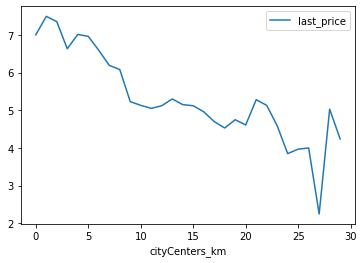

In [81]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb_pivot = round(data_spb.pivot_table(index='cityCenters_km', values='last_price'), 2)
axes = data_spb_pivot.plot()

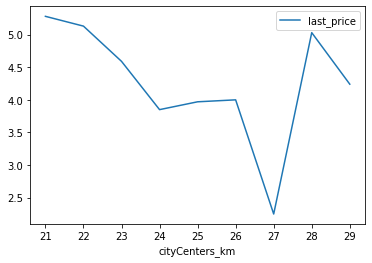

In [82]:
data_spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_km > 20')
data_spb_pivot = round(data_spb.pivot_table(index='cityCenters_km', values='last_price'), 2)
axes = data_spb_pivot.plot()

In [83]:
display(data_spb.query('cityCenters_km == 27')['last_price'].count())
display(data_spb.query('cityCenters_km == 28')['last_price'].count())
data_spb.query('cityCenters_km == 29')['last_price'].count()

1

7

6

Исходя из графика выше, очевидно что наибольшая стоимость объектов в центре города и на небольшом расстоянии от него. С удалением от центра стоимость объектов снижается пропорционально расстоянию. Локальные минимумы в конце объясняются малым количеством объявлений.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Обрати внимание, что по заданию нужно рассмотреть динамику средней цены за объект (квартиры), а не кв метра.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

### Напишите общий вывод

Была проделана следующая работа:
1. Была произведена предобработка данных
    1. Исходные данные были проанализированы на наличие пропусков
    1. Были сделаны выводы о возможности заполнения пропусков в данных
    1. Произведено заполнение пропусков, там где это представлялось возможным и целесообразным
    1. Типы данных в столбцах были проанализированы и изменены в соответствии с хранящийся в них информацией. Учтено наличие возможных пропусков
    1. Неявные дубликаты были выявлены и устранены
1. Исходная таблица была расширена новыми данными
    1. Рассчитана и добавлена как отдельный столбец цена квадратного метра
    1. Добавлен столбец с типом этажа квартиры
    1. расстояние до центра города приведено к км с округлением до целого
1. Произведен исследовательский анализ данных
    1. Проанализированы некоторые столбцы на наличие вбросов
    1. Обнаруженные вбросы исключены, для повышения качества данных
    1. Изучена скорость продажи квартир и сделаны выводы
    1. Определено какие факторы имеют влияние на общую цену
    1. Определена цена квадратного метра для наиболее часто встречающихся населенных пунктов
    1. Вычислена зависимость стоимость квадратного метра от удаленности от центра города для Санкт-Петербурга

Исходные данные содержали значительное количество пропусков, однако самые важные категории были заполнены на 100%. Часть недостающих числовых данных заполнена с использованием медианных значений. Часть исходя из базовой логики. Пропуски в площадях заполнены исходя из среднего коэффициента соотношения общей площади объекта к его составным частям. Пропуски в счетчике дней с момента выставления объявления, заполнены исходя из даты выставления объявления. А также даты закрытия сбора информации по-данному датасету. Удалены строки с пропусками в названии локации.

Изменен тип данных для даты выставления объявления. Это необходимо для удобства работы. Также измене тип данных для целочисленных значений на int, для экономии вычислительных ресурсов и памяти

В названиях населенных пунктов исключены чередования `е` и `ё`. А также исключена путаница в типах населенных пунктов

Всего при предобработке данных исключено 49 строк

В анализе данных применены знания о распределениях значений. Для выявления вбросов применена диаграма размаха. Вбросы исключены на основе значений квартилей и расчета длины "усов". Благодоря исключению лишних значений качество данных повысилось

Сделаны следующие выводы:
* Продажу которая совершилась за период меньше 40 дней, можно считать быстрой
* Если сделка не произошла за 483 дня, то эту продажу можно считать долгой
* Есть трудно объяснимые всплески сделок на 45 и 60 день размещения объявления.
* Общая площадь имеет сильное влияние на цену
* Жилая площадь имеет влияние на цену
* Площадь кухни имеет влияние на цену
* Количество комнат имеет влияние на цену. Чем больше комнат, тем выше цена. Однако 6 комнатные квартиры стоят несколько меньше чем 5. 
* Тип этажа имеет незначительное влияние на цену. Квартиры на первых и последних этажах стоят немного дешевле
* День недели не имеет влияние на цену
* Месяц не имеет влияния на цену. Наблюдается едва заметные колебания от месяца к месяцу
* Год имеет незначительное влияние на цену. В 2016 и 2017 годах было незначительное снижение цены. Далее цена только росла.
* Стоимость квадратного метра сильно различается в зависимости от населенного пункта
* Стоимость объекта наибольшая в центре и на небольшом расстоянии от центра Санкт-Петербурга
* С удалением от центра Санкт-Петербурга цена пропорционально снижается

Рекомендации по повышению качества сбора данных:
* По возможность максимально исключить возможность попадания пропусков в исходные данные, путем более качественной настройки формы сбора данных
* Ввести логические ограничения по некоторым категориям данных. Например ограничить поле ввода высоты этажа. Чтобы нельзя было ввести значение 35м.
* Проверить правильность работы алгоритма по заполенинию столбца `is_apartment`. Возможно имеет место логическая ошибка в коде
* Подумать над возможностью сделать некоторые поля обязательными для ввода. Такие как площадь кухни и жилая площадь.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Структура вывода верная. Отдельные моменты нужно будет поправить после доработки проекта.
    
Можно дать рекомендации сервису размещения объявлений как повысить качество сбора данных.

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Вывод поправил с учетом изменений. Добавил рекомендации.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

В пункте 4.2 у меня есть небольшой вопрос. Буду благодарен если поможешь мне с ним разобраться.</div>

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера V2 ✔️</b>

Да, прокомментировал этот момент.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера</b></h5>

У тебя получился хороший проект. Но нужно кое-что поправить, чтобы я его принял.

Критические замечания я добавил в меню **Contents** слева.

Также, постарайся отработать желтые комментарии.

Буду ждать твой доработанный проект. ⌛️

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера V2</b></h5>

Отлично! Ты внимательно учел мои комментарии и проделал большую работу по улучшению проекта.

Успехов в дальнейшем обучении! 🏆

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.